In [136]:
import random
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,LeakyReLU,BatchNormalization
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

In [137]:
#ignore this cell
from jupyterthemes import jtplot
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

In [138]:
%matplotlib inline

In [139]:
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

In [140]:
#shape of image
print(x_train.shape)
print(x_valid.shape)

(60000, 28, 28)
(10000, 28, 28)


In [141]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_valid = x_valid.reshape((x_valid.shape[0],28,28,1))

In [142]:
def preprocess(x):
    x.astype('float32')
    x = x/255   #max value of pixel is 255
    
    return x

In [143]:
x_train = preprocess(x_train)
x_valid = preprocess(x_valid)

In [144]:
number_of_classes = len(np.unique(y_train))

In [145]:
y_train = keras.utils.to_categorical(y_train,number_of_classes)
y_valid = keras.utils.to_categorical(y_valid,number_of_classes)

In [158]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(filters=14,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(number_of_classes,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(lr=0.001),
              metrics=['accuracy'])

In [159]:
early_stopping = EarlyStopping(monitor='val_acc',mode='max',min_delta=0.00005,baseline=0.98,patience=15,restore_best_weights=True,verbose=1)
lr = ReduceLROnPlateau(monitor='val_acc',patience=5,factor=0.5,min_lr=1e-6,verbose=1)
callbacks= [early_stopping,lr]

In [160]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_71 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 11, 11, 14)        4046      
_________________________________________________________________
batch_normalization_72 (Batc (None, 11, 11, 14)        56        
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 5, 5, 14)          0         
__________

In [161]:
final = model.fit(x_train, y_train,batch_size=128,epochs=100,verbose=1,validation_data=(x_valid, y_valid),callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.4179 - acc: 0.8697 - val_loss: 0.0993 - val_acc: 0.9695
Epoch 2/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.1151 - acc: 0.9639 - val_loss: 0.0798 - val_acc: 0.9730
Epoch 3/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0878 - acc: 0.9728 - val_loss: 0.0569 - val_acc: 0.9811
Epoch 4/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0739 - acc: 0.9771 - val_loss: 0.0502 - val_acc: 0.9836
Epoch 5/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0659 - acc: 0.9794 - val_loss: 0.0531 - val_acc: 0.9832
Epoch 6/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.0632 - acc: 0.9803 - val_loss: 0.0553 - val_acc: 0.9822
Epoch 7/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.0571 - acc: 0.9819 - val_loss: 0.0416 -

Epoch 57/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.0242 - acc: 0.9919 - val_loss: 0.0304 - val_acc: 0.9908
Epoch 58/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.0250 - acc: 0.9915 - val_loss: 0.0303 - val_acc: 0.9909

Epoch 00058: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 59/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.0240 - acc: 0.9921 - val_loss: 0.0299 - val_acc: 0.9909
Epoch 60/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.0245 - acc: 0.9918 - val_loss: 0.0302 - val_acc: 0.9909
Epoch 61/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0242 - acc: 0.9921 - val_loss: 0.0304 - val_acc: 0.9910
Epoch 62/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.0242 - acc: 0.9922 - val_loss: 0.0302 - val_acc: 0.9908
Epoch 63/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.0

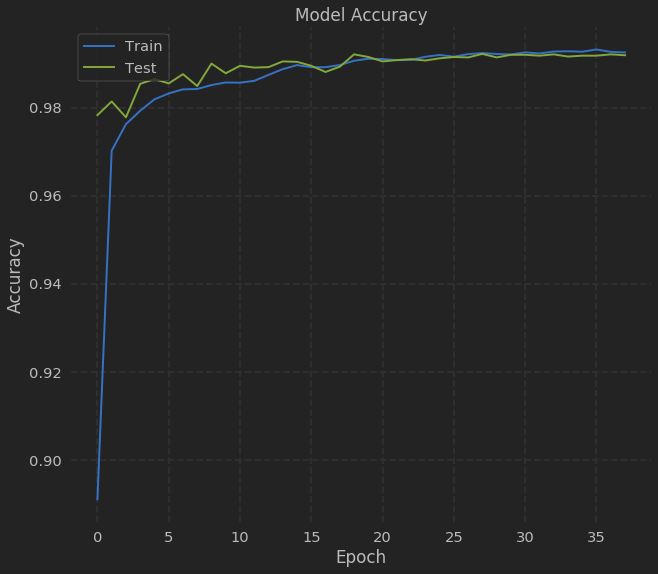

In [128]:
train_loss = final.history['loss']
val_loss = final.history['val_loss']

train_acc = final.history['acc']
val_acc = final.history['val_acc']

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()